# RAPIDS cuML
## Performance, Boundaries, and Correctness Benchmarks

**Description:** This notebook provides a simple and unified means of benchmarking single GPU cuML algorithms against their skLearn counterparts with the `cuml.benchmark` package in RAPIDS cuML. This enables quick and simple measurements of performance, validation of correctness, and investigation of upper bounds.

Each benchmark returns a Pandas `DataFrame` with the results. At the end of the notebook, these results are used to draw charts and output to a CSV file.

Please refer to the [table of contents](#table_of_contents) for algorithms available to be benchmarked with this notebook.

In [39]:
#check GPU
!nvidia-smi

Tue May 13 09:30:21 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   76C    P0             34W /   72W |     343MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import cuml
import pandas as pd

from cuml.benchmark.runners import SpeedupComparisonRunner
from cuml.benchmark.algorithms import algorithm_by_name

import warnings
warnings.filterwarnings('ignore', 'Expected column ')

print(cuml.__version__)

25.02.01


In [3]:
N_REPS = 1  # Number of times each test is repeated

DATA_NEIGHBORHOODS = "blobs"
DATA_CLASSIFICATION = "classification"
DATA_REGRESSION = "regression"

INPUT_TYPE = "numpy"

benchmark_results = []

In [4]:
SMALL_ROW_SIZES = [2**x for x in range(14, 17)]
LARGE_ROW_SIZES = [2**x for x in range(18, 24, 2)]

SKINNY_FEATURES = [32]#, 256]
WIDE_FEATURES = [1000, 10000]

VERBOSE=True
RUN_CPU=True

In [5]:
def enrich_result(algorithm, runner, result):
    result["algo"] = algorithm
    result["dataset_name"] = runner.dataset_name
    result["input_type"] = runner.input_type
    return result

def execute_benchmark(algorithm, runner, verbose=VERBOSE, run_cpu=RUN_CPU, **kwargs):
    results = runner.run(algorithm_by_name(algorithm), verbose=verbose, run_cpu=run_cpu, **kwargs)
    results = [enrich_result(algorithm, runner, result) for result in results]
    benchmark_results.extend(results)

## Table of Contents<a id="table_of_contents"/>

### Benchmarks
1. [Neighbors](#neighbors)<br>
    1.1 [Nearest Neighbors - Brute Force](#nn_bruteforce)<br>
    1.2 [KNeighborsClassifier](#kneighborsclassifier)<br>
    1.3 [KNeighborsRegressor](#kneighborsregressor)<br>
2. [Clustering](#clustering)<br>
    2.1 [DBSCAN - Brute Force](#dbscan_bruteforce)<br>
    2.2 [K-Means](#kmeans)<br>
3. [Manifold Learning](#manifold_learning)<br>
    3.1 [UMAP - Unsupervised](#umap_unsupervised)<br>
    3.2 [UMAP - Supervised](#umap_supervised)<br>
    3.3 [T-SNE](#tsne)<br>
4. [Linear Models](#linear_models)<br>
    4.1 [Linear Regression](#linear_regression)<br>
    4.2 [Logistic Regression](#logistic_regression)<br>
    4.3 [Ridge Regression](#ridge_regression)<br>
    4.4 [Lasso Regression](#lasso_regression)<br>
    4.5 [ElasticNet Regression](#elasticnet_regression)<br>
    4.6 [Mini-batch SGD Classifier](#minibatch_sgd_classifier)<br>
5. [Decomposition](#decomposition)<br>
    5.1 [PCA](#pca)<br>
    5.2 [Truncated SVD](#truncated_svd)<br>
6. [Ensemble](#ensemble)<br>
    6.1 [Random Forest Classifier](#random_forest_classifier)<br>
    6.2 [Random Forest Regressor](#random_forest_regressor)<br>
    6.3 [FIL](#fil)<br>
    6.4 [Sparse FIL](#sparse_fil)<br>
7. [Random Projection](#random_projection)<br>
    7.1 [Gaussian Random Projection](#gaussian_random_projection)<br>
    7.2 [Sparse Random Projection](#sparse_random_projection)<br>
8. [SVM](#svm)<br>
    8.1 [SVC - Linear Kernel](#svc_linear_kernel)<br>
    8.2 [SVC - RBF Kernel](#svc_rbf_kernel)<br>
    8.3 [SVR - Linear Kernel](#svr_linear_kernel)<br>
    8.4 [SVR - RBF Kernel](#svr_rbf_kernel)<br>
    
### Chart & Store Results
9. [Convert to Pandas DataFrame](#convert_to_pandas)<br>
10. [Chart Results](#chart_results)<br>
11. [Output to CSV](#output_csv)<br>

## Neighbors<a id="neighbors"/>


### Nearest Neighbors - Brute Force<a id="nn_bruteforce"/>

In [6]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES,
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS,
)

execute_benchmark("NearestNeighbors", runner)

NearestNeighbors (n_samples=16384, n_features=32) [cpu=0.4051039218902588, gpu=0.3504364490509033, speedup=1.1559982501461046]
NearestNeighbors (n_samples=32768, n_features=32) [cpu=1.1926634311676025, gpu=0.07591652870178223, speedup=15.710194493384462]
NearestNeighbors (n_samples=65536, n_features=32) [cpu=4.695568799972534, gpu=0.20873689651489258, speedup=22.49515480190884]


### KNeighborsClassifier<a id="kneighborsclassifier"/>

In [7]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES,
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_CLASSIFICATION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("KNeighborsClassifier", runner)

KNeighborsClassifier (n_samples=16384, n_features=32) [cpu=1.0371251106262207, gpu=0.9540276527404785, speedup=1.0871017288094762]
KNeighborsClassifier (n_samples=32768, n_features=32) [cpu=2.5401206016540527, gpu=0.03027820587158203, speedup=83.89270528205613]
KNeighborsClassifier (n_samples=65536, n_features=32) [cpu=7.757059812545776, gpu=0.10713696479797363, speedup=72.40320674729897]


### KNeighborsRegressor<a id="kneighborsregressor"/>

In [8]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES,
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_REGRESSION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("KNeighborsRegressor", runner)

KNeighborsRegressor (n_samples=16384, n_features=32) [cpu=0.3080425262451172, gpu=0.013019800186157227, speedup=23.659543298723655]
KNeighborsRegressor (n_samples=32768, n_features=32) [cpu=1.0115330219268799, gpu=0.028974056243896484, speedup=34.91168145088294]
KNeighborsRegressor (n_samples=65536, n_features=32) [cpu=3.9294309616088867, gpu=0.10236024856567383, speedup=38.38825146157967]


## Clustering<a id="clustering"/>

### DBSCAN - Brute Force<a id="dbscan_bruteforce"/>

In [9]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES,
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("DBSCAN", runner)

DBSCAN (n_samples=16384, n_features=32) [cpu=0.2001500129699707, gpu=0.1439528465270996, speedup=1.390385933996045]
DBSCAN (n_samples=32768, n_features=32) [cpu=0.8100845813751221, gpu=0.02134561538696289, speedup=37.950865631631856]
[2025-05-13 09:08:07.698] [CUML] [warning] Batch size limited by the chosen integer type (4 bytes). 58063 -> 32767. Using the larger integer type might result in better performance
DBSCAN (n_samples=65536, n_features=32) [cpu=2.60650372505188, gpu=0.11089754104614258, speedup=23.503710726709063]


### K-means Clustering<a id="kmeans"/>

In [10]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES,
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type="numpy",
    n_reps=N_REPS
)

execute_benchmark("KMeans", runner)

KMeans (n_samples=16384, n_features=32) [cpu=0.04409670829772949, gpu=0.145735502243042, speedup=0.3025804119039556]
KMeans (n_samples=32768, n_features=32) [cpu=0.05510735511779785, gpu=0.027319908142089844, speedup=2.0171134848326178]
KMeans (n_samples=65536, n_features=32) [cpu=0.10256743431091309, gpu=0.05454730987548828, speedup=1.8803390037939052]


## Manifold Learning<a id="manifold_learning"/>

### UMAP - Unsupervised<a id="umap_unsupervised"/>
CPU benchmark requires UMAP-learn

In [11]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES,
    bench_dims=WIDE_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("UMAP-Unsupervised", runner)

[2025-05-13 09:08:10.938] [CUML] [info] Building knn graph using brute force


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


UMAP-Unsupervised (n_samples=16384, n_features=1000) [cpu=25.76822328567505, gpu=0.6305210590362549, speedup=40.86814059004075]
[2025-05-13 09:08:38.145] [CUML] [info] Building knn graph using brute force


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


UMAP-Unsupervised (n_samples=16384, n_features=10000) [cpu=8.60979437828064, gpu=2.7429721355438232, speedup=3.138855939042799]
[2025-05-13 09:08:49.082] [CUML] [info] Building knn graph using brute force


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


UMAP-Unsupervised (n_samples=32768, n_features=1000) [cpu=8.023133993148804, gpu=0.898723840713501, speedup=8.92725176487941]
[2025-05-13 09:08:59.629] [CUML] [info] Building knn graph using brute force


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


UMAP-Unsupervised (n_samples=32768, n_features=10000) [cpu=19.274614334106445, gpu=10.168844938278198, speedup=1.8954575914076282]
[2025-05-13 09:09:28.232] [CUML] [info] Building knn graph using nn descent


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


UMAP-Unsupervised (n_samples=65536, n_features=1000) [cpu=16.238335132598877, gpu=1.47471022605896, speedup=11.011203994966843]
[2025-05-13 09:09:49.395] [CUML] [info] Building knn graph using nn descent


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


UMAP-Unsupervised (n_samples=65536, n_features=10000) [cpu=41.67901158332825, gpu=11.494879484176636, speedup=3.6258763426534233]


### UMAP - Supervised<a id="umap_supervised"/>
CPU benchmark requires UMAP-learn

In [12]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES,
    bench_dims=WIDE_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("UMAP-Supervised", runner)

[2025-05-13 09:10:40.354] [CUML] [info] Building knn graph using brute force


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


UMAP-Supervised (n_samples=16384, n_features=1000) [cpu=5.087142467498779, gpu=0.24741673469543457, speedup=20.56102823344168]
[2025-05-13 09:10:45.796] [CUML] [info] Building knn graph using brute force


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


UMAP-Supervised (n_samples=16384, n_features=10000) [cpu=9.857232570648193, gpu=2.378274440765381, speedup=4.144699367612057]
[2025-05-13 09:10:57.936] [CUML] [info] Building knn graph using brute force


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


UMAP-Supervised (n_samples=32768, n_features=1000) [cpu=8.797965288162231, gpu=0.8803935050964355, speedup=9.99321921076477]
[2025-05-13 09:11:07.838] [CUML] [info] Building knn graph using brute force


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


UMAP-Supervised (n_samples=32768, n_features=10000) [cpu=20.451627731323242, gpu=11.97066354751587, speedup=1.7084790371179823]
[2025-05-13 09:11:40.063] [CUML] [info] Building knn graph using nn descent


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


UMAP-Supervised (n_samples=65536, n_features=1000) [cpu=17.881019353866577, gpu=1.5305359363555908, speedup=11.682848425267071]
[2025-05-13 09:11:59.918] [CUML] [info] Building knn graph using nn descent


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


UMAP-Supervised (n_samples=65536, n_features=10000) [cpu=43.973843574523926, gpu=10.0225350856781, speedup=4.387497095157214]


### T-SNE<a id="tsne"/>

In [13]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES,
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

# Due to extreme high runtime, the CPU benchmark
# is disabled. Use run_cpu=True to re-enable.

execute_benchmark("TSNE", runner, run_cpu=True)

[2025-05-13 09:12:53.549] [CUML] [warning] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:405: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)


TSNE (n_samples=16384, n_features=32) [cpu=49.174997329711914, gpu=1.5018939971923828, speedup=32.74198939581547]
[2025-05-13 09:13:44.124] [CUML] [warning] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:405: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)


TSNE (n_samples=32768, n_features=32) [cpu=103.74755454063416, gpu=1.3392071723937988, speedup=77.46938388568218]
[2025-05-13 09:15:29.223] [CUML] [warning] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:405: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)


TSNE (n_samples=65536, n_features=32) [cpu=268.92555236816406, gpu=2.074082851409912, speedup=129.65998546555403]


## Linear Models<a id="linear_models"/>

### Linear Regression<a id="linear_regression"/>

In [14]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES,
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_REGRESSION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("LinearRegression", runner)

LinearRegression (n_samples=16384, n_features=32) [cpu=0.011136293411254883, gpu=0.11396956443786621, speedup=0.09771287155638955]
LinearRegression (n_samples=32768, n_features=32) [cpu=0.016059160232543945, gpu=0.004288196563720703, speedup=3.7449683086845322]
LinearRegression (n_samples=65536, n_features=32) [cpu=0.03016519546508789, gpu=0.00549006462097168, speedup=5.494506448951231]


### Logistic Regression<a id="logistic_regression"/>

In [15]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES,
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_CLASSIFICATION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("LogisticRegression", runner)

LogisticRegression (n_samples=16384, n_features=32) [cpu=0.9874906539916992, gpu=2.205716133117676, speedup=0.4476961650527204]
LogisticRegression (n_samples=32768, n_features=32) [cpu=0.6928195953369141, gpu=0.026679277420043945, speedup=25.968454258675077]
LogisticRegression (n_samples=65536, n_features=32) [cpu=0.8168232440948486, gpu=0.015152692794799805, speedup=53.90614428447801]


### Ridge Regression<a id="ridge_regression"/>

In [16]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES,
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_REGRESSION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("Ridge", runner)

Ridge (n_samples=16384, n_features=32) [cpu=0.04369211196899414, gpu=0.0060994625091552734, speedup=7.163272485634992]
Ridge (n_samples=32768, n_features=32) [cpu=0.007589101791381836, gpu=0.009418487548828125, speedup=0.8057665046577561]
Ridge (n_samples=65536, n_features=32) [cpu=0.013546228408813477, gpu=0.008407831192016602, speedup=1.611144193960017]


### Lasso Regression<a id="lasso_regression"/>

In [17]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES,
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_REGRESSION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("Lasso", runner)

Lasso (n_samples=16384, n_features=32) [cpu=0.07908487319946289, gpu=0.035482168197631836, speedup=2.2288624742143353]
Lasso (n_samples=32768, n_features=32) [cpu=0.00785517692565918, gpu=0.006490230560302734, speedup=1.2103078392476674]
Lasso (n_samples=65536, n_features=32) [cpu=0.012638568878173828, gpu=0.0073053836822509766, speedup=1.7300349205313144]


### ElasticNet Regression<a id="elasticnet_regression"/>

In [18]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES,
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_REGRESSION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("ElasticNet", runner)

ElasticNet (n_samples=16384, n_features=32) [cpu=0.004723787307739258, gpu=0.006328105926513672, speedup=0.7464772812900309]
ElasticNet (n_samples=32768, n_features=32) [cpu=0.007857561111450195, gpu=0.006370067596435547, speedup=1.2335129874990642]
ElasticNet (n_samples=65536, n_features=32) [cpu=0.012409687042236328, gpu=0.007365226745605469, speedup=1.684902240062152]


### Mini-batch SGD Classifier<a id="minibatch_sgd_classifier"/>

In [19]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES,
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_CLASSIFICATION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("MBSGDClassifier", runner)

/usr/local/lib/python3.11/dist-packages/cuml/benchmark/runners.py:128: UserWarning: run_cpu argument is set to True but no CPU implementation was provided. It's possible an additional library is needed but one could not be found. Benchmark will be executed with run_cpu=False
  warnings.warn(


MBSGDClassifier (n_samples=16384, n_features=32) [cpu=0.0, gpu=3.3468809127807617, speedup=0.0]
MBSGDClassifier (n_samples=32768, n_features=32) [cpu=0.0, gpu=6.674870014190674, speedup=0.0]
MBSGDClassifier (n_samples=65536, n_features=32) [cpu=0.0, gpu=13.232096910476685, speedup=0.0]


## Decomposition<a id="decomposition"/>

### PCA<a id="pca"/>

In [20]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES,
    bench_dims=WIDE_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("PCA", runner)

PCA (n_samples=16384, n_features=1000) [cpu=0.23986411094665527, gpu=0.0782616138458252, speedup=3.064901158557576]
PCA (n_samples=16384, n_features=10000) [cpu=3.0699992179870605, gpu=4.711993932723999, speedup=0.6515286865431715]
PCA (n_samples=32768, n_features=1000) [cpu=0.38746070861816406, gpu=0.0637505054473877, speedup=6.077766849047642]
PCA (n_samples=32768, n_features=10000) [cpu=4.172417402267456, gpu=5.069212436676025, speedup=0.8230898693611243]
PCA (n_samples=65536, n_features=1000) [cpu=0.5880343914031982, gpu=0.11598396301269531, speedup=5.069962916673519]
PCA (n_samples=65536, n_features=10000) [cpu=6.948704481124878, gpu=6.6850926876068115, speedup=1.0394327806414358]


### Truncated SVD<a id="truncated_svd"/>

In [21]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES,
    bench_dims=WIDE_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("TSVD", runner)

tSVD (n_samples=16384, n_features=1000) [cpu=0.9915599822998047, gpu=0.05663800239562988, speedup=17.506973063306912]
tSVD (n_samples=16384, n_features=10000) [cpu=2.142000198364258, gpu=4.6575400829315186, speedup=0.45989946628995065]
tSVD (n_samples=32768, n_features=1000) [cpu=1.2293994426727295, gpu=0.06673955917358398, speedup=18.42085051049206]
tSVD (n_samples=32768, n_features=10000) [cpu=3.542910099029541, gpu=5.067590713500977, speedup=0.6991310662857182]
tSVD (n_samples=65536, n_features=1000) [cpu=1.7160484790802002, gpu=0.12008166313171387, speedup=14.290678812450487]
tSVD (n_samples=65536, n_features=10000) [cpu=4.990565299987793, gpu=6.5731401443481445, speedup=0.7592361018316163]


## Ensemble<a id="ensemble"/>

### Random Forest Classifier<a id="random_forest_classifier"/>

In [22]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES,
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_CLASSIFICATION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("RandomForestClassifier", runner)

RandomForestClassifier (n_samples=16384, n_features=32) [cpu=1.5002923011779785, gpu=0.45855116844177246, speedup=3.2718100060156927]
RandomForestClassifier (n_samples=32768, n_features=32) [cpu=3.2085838317871094, gpu=0.22383856773376465, speedup=14.33436545038755]
RandomForestClassifier (n_samples=65536, n_features=32) [cpu=7.950809001922607, gpu=0.31198930740356445, speedup=25.48423555951575]


### Random Forest Regressor<a id="random_forest_regressor"/>

In [23]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES,
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_REGRESSION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("RandomForestRegressor", runner)

RandomForestRegressor (n_samples=16384, n_features=32) [cpu=7.108882188796997, gpu=0.3020336627960205, speedup=23.536721446834242]
RandomForestRegressor (n_samples=32768, n_features=32) [cpu=15.625266551971436, gpu=0.33471035957336426, speedup=46.68294871986648]
RandomForestRegressor (n_samples=65536, n_features=32) [cpu=34.321566343307495, gpu=0.4237346649169922, speedup=80.99777805535675]


### FIL<a id="fil"/>
CPU benchmark requires XGBoost Library

In [24]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES,
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_CLASSIFICATION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("FIL", runner)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:22:46] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:22:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "fil_algo", "num_rounds", "output_class", "precision", "silent", "storage_type", "threshold" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:22:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgb

Failed to run with 16384 samples, 32 features: [09:22:47] /workspace/dmlc-core/src/io/local_filesys.cc:210: Check failed: allow_null:  LocalFileSystem::Open "/tmp/tmp0d0qqpbq/xgb_10_100_32_16384.model": No such file or directory
Stack trace:
  [bt] (0) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x25c1ac) [0x7fafb225c1ac]
  [bt] (1) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0xf3770d) [0x7fafb2f3770d]
  [bt] (2) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0xf23b25) [0x7fafb2f23b25]
  [bt] (3) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(XGBoosterLoadModel+0x1f3) [0x7fafb216b8a3]
  [bt] (4) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7fb1b3bc2e2e]
  [bt] (5) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7fb1b3bbf493]
  [bt] (6) /usr/lib/python3.11/lib-dynload/_ctypes.cpython-311-x86_64-linux-gnu.so(+0xa4d8) [0x7fb1b3e234d8]
  [bt] (7) /usr/lib/python3.11/lib-dynload/_ctypes.cpython-311-x86_64-li

## Sparse FIL<a id="sparse_fil"/>
Requires TreeLite library

In [25]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES,
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_CLASSIFICATION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("Sparse-FIL-SKL", runner)

[2025-05-13 09:22:49.428] [CUML] [warning] Treelite currently does not support float64 model parameters. Accuracy may degrade slightly relative to native sklearn invocation.
Sparse-FIL-SKL (n_samples=16384, n_features=32) [cpu=0.045763254165649414, gpu=0.003198862075805664, speedup=14.30610419616904]
[2025-05-13 09:22:52.841] [CUML] [warning] Treelite currently does not support float64 model parameters. Accuracy may degrade slightly relative to native sklearn invocation.
Sparse-FIL-SKL (n_samples=32768, n_features=32) [cpu=0.06020164489746094, gpu=0.004590272903442383, speedup=13.115047005661456]
[2025-05-13 09:23:00.433] [CUML] [warning] Treelite currently does not support float64 model parameters. Accuracy may degrade slightly relative to native sklearn invocation.
Sparse-FIL-SKL (n_samples=65536, n_features=32) [cpu=0.10848474502563477, gpu=0.007891178131103516, speedup=13.747598042177776]


## Random Projection<a id="random_projection"/>

### Gaussian Random Projection<a id="gaussian_random_projection"/>

In [26]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES,
    bench_dims=WIDE_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("GaussianRandomProjection", runner)

GaussianRandomProjection (n_samples=16384, n_features=1000) [cpu=0.006206035614013672, gpu=0.028664112091064453, speedup=0.21650890822284696]
GaussianRandomProjection (n_samples=16384, n_features=10000) [cpu=0.05835914611816406, gpu=0.18933629989624023, speedup=0.3082300971876283]
GaussianRandomProjection (n_samples=32768, n_features=1000) [cpu=0.011671066284179688, gpu=0.041652679443359375, speedup=0.2801996519827823]
GaussianRandomProjection (n_samples=32768, n_features=10000) [cpu=0.11245536804199219, gpu=0.3759639263153076, speedup=0.29911212265529924]
GaussianRandomProjection (n_samples=65536, n_features=1000) [cpu=0.022894620895385742, gpu=0.0785677433013916, speedup=0.29139975177294203]
GaussianRandomProjection (n_samples=65536, n_features=10000) [cpu=0.21961069107055664, gpu=0.7474985122680664, speedup=0.29379415138126763]


### Sparse Random Projection<a id="sparse_random_projection"/>

In [27]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES,
    bench_dims=WIDE_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("SparseRandomProjection", runner)

SparseRandomProjection (n_samples=16384, n_features=1000) [cpu=0.0067043304443359375, gpu=0.022805452346801758, speedup=0.29397927926986084]
SparseRandomProjection (n_samples=16384, n_features=10000) [cpu=0.0578157901763916, gpu=0.1879129409790039, speedup=0.30767327612019835]
SparseRandomProjection (n_samples=32768, n_features=1000) [cpu=0.012148857116699219, gpu=0.03957819938659668, speedup=0.3069583079823859]
SparseRandomProjection (n_samples=32768, n_features=10000) [cpu=0.11234188079833984, gpu=0.37236928939819336, speedup=0.30169480673312715]
SparseRandomProjection (n_samples=65536, n_features=1000) [cpu=0.022851228713989258, gpu=0.07795572280883789, speedup=0.29313086827537693]
SparseRandomProjection (n_samples=65536, n_features=10000) [cpu=0.21895718574523926, gpu=0.7475981712341309, speedup=0.29288084718530805]


## SVM<a id="svm"/>

### SVC - Linear Kernel<a id="svc_linear_kernel"/>

In [28]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES,
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_CLASSIFICATION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

# Due to extreme high runtime, the CPU benchmark
# is disabled. Use run_cpu=True to re-enable.

execute_benchmark("SVC-Linear", runner, run_cpu=True)

[2025-05-13 09:23:06.868] [CUML] [warning] SVC with the linear kernel can be much faster using the specialized solver provided by LinearSVC. Consider switching to LinearSVC if tranining takes too long.
SVC-Linear (n_samples=16384, n_features=32) [cpu=5.015956163406372, gpu=0.5184750556945801, speedup=9.674440666555691]
SVC-Linear (n_samples=32768, n_features=32) [cpu=2.026012659072876, gpu=0.030268192291259766, speedup=66.93537029160169]
SVC-Linear (n_samples=65536, n_features=32) [cpu=8.22862982749939, gpu=0.04286694526672363, speedup=191.95745757715645]


### SVC - RBF Kernel<a id="svc_rbf_kernel"/>

In [29]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES,
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_CLASSIFICATION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

# Due to extreme high runtime, the CPU benchmark
# is disabled. Use run_cpu=True to re-enable.

execute_benchmark("SVC-RBF", runner, run_cpu=True)

SVC-RBF (n_samples=16384, n_features=32) [cpu=2.3553011417388916, gpu=0.04811239242553711, speedup=48.95414721652345]
SVC-RBF (n_samples=32768, n_features=32) [cpu=17.053751945495605, gpu=0.11311912536621094, speedup=150.75922740991788]
SVC-RBF (n_samples=65536, n_features=32) [cpu=56.311737298965454, gpu=0.2953908443450928, speedup=190.63467394804832]


### SVR - Linear Kernel<a id="svr_linear_kernel"/>

In [30]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES,
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_REGRESSION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

# Due to extreme high runtime, the CPU benchmark
# is disabled. Use run_cpu=True to re-enable.

execute_benchmark("SVR-Linear", runner, run_cpu=False)

[2025-05-13 09:24:38.987] [CUML] [warning] SVR with the linear kernel can be much faster using the specialized solver provided by LinearSVR. Consider switching to LinearSVR if tranining takes too long.
SVR-Linear (n_samples=16384, n_features=32) [cpu=0.0, gpu=0.4862849712371826, speedup=0.0]
SVR-Linear (n_samples=32768, n_features=32) [cpu=0.0, gpu=0.4269084930419922, speedup=0.0]
SVR-Linear (n_samples=65536, n_features=32) [cpu=0.0, gpu=0.4005274772644043, speedup=0.0]


### SVR - RBF Kernel<a id="svr_rbf_kernel"/>

In [31]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES,
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_REGRESSION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("SVR-RBF", runner)

SVR-RBF (n_samples=16384, n_features=32) [cpu=13.839437246322632, gpu=0.10237455368041992, speedup=135.18434756282167]
SVR-RBF (n_samples=32768, n_features=32) [cpu=52.82435131072998, gpu=0.3085803985595703, speedup=171.18505114812868]
SVR-RBF (n_samples=65536, n_features=32) [cpu=272.353887796402, gpu=1.1234796047210693, speedup=242.419966194242]


## Charting & Storing Results<a id="charting_and_storing_results"/>

### Convert Results to Pandas DataFrame<a id="convert_to_pandas"/>

In [32]:
%matplotlib inline

In [33]:
df = pd.DataFrame(benchmark_results)

### Chart Results<a id="chart_results"/>

In [34]:
def chart_single_algo_speedup(df, algorithm):
    df = df.loc[df.algo == algorithm]
    df = df.pivot(index="n_samples", columns="n_features", values="speedup")
    axes = df.plot.bar(title="%s Speedup" % algorithm)

In [35]:
def chart_all_algo_speedup(df):
    df = df[["algo", "n_samples", "speedup"]].groupby(["algo", "n_samples"]).mean()
    df.plot.bar()

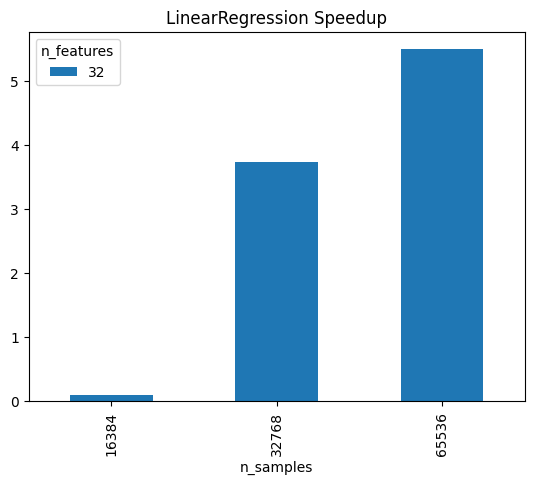

In [36]:
chart_single_algo_speedup(df, "LinearRegression")

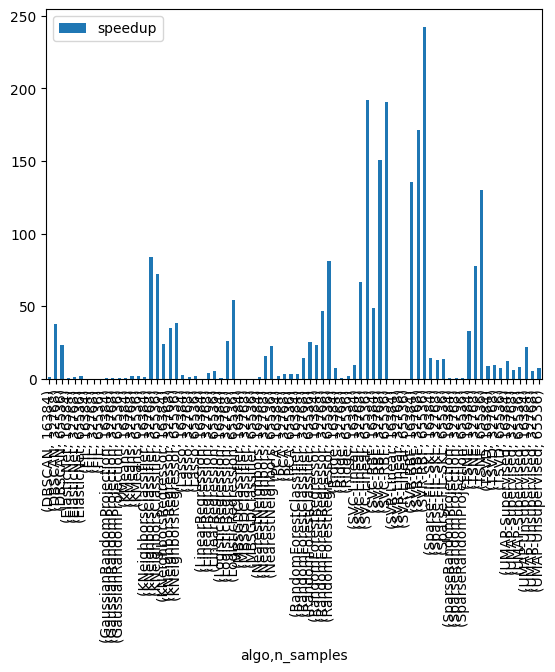

In [37]:
chart_all_algo_speedup(df)

### Output Results to CSV<a id="output_csv"/>

In [38]:
df.to_csv("benchmark_results.csv")